In [46]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
tf.__version__

'2.9.2'

In [47]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = ((train_images)/255)[0:5000]
test_images = ((test_images)/255)[0:1000]

label_dict = {
 0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
}

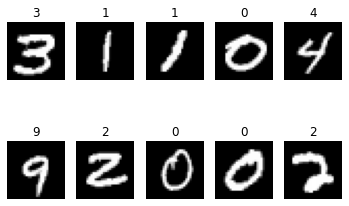

In [48]:
for i in range(1,11):
  if i <= 5:
    plt.subplot(2, 5, i)
    plt.title(label_dict[train_labels[i+110]])
    plt.imshow(train_images[i+110],cmap='gray')
    plt.axis(False)
  else:
    plt.subplot(2, 5, i)
    plt.title(label_dict[train_labels[i+110]])
    plt.imshow(train_images[i+110],cmap='gray')
    plt.axis(False)

plt.show()

In [49]:
def conv2d(X,W,b,stride=1):
  hidden = tf.nn.conv2d(X,W,strides=[1,stride,stride,1],padding='SAME')
  hidden = tf.nn.bias_add(hidden,b)
  return tf.nn.relu(hidden)

def maxpool2d(X,k=2):
  return tf.nn.max_pool(X,ksize=[1,k,k,1],strides=[1,k,k,1],padding='SAME')

In [50]:
train_images = train_images.reshape([-1,28,28,1])
test_images = test_images.reshape([-1,28,28,1])

In [51]:
init = tf.initializers.GlorotUniform()
weights = {
    'wc1': tf.Variable(init(shape=(3,3,1,32)),trainable=True),
    'wc2': tf.Variable(init(shape=(3,3,32,64)),trainable=True),
    'wc3': tf.Variable(init(shape=(3,3,64,128)),trainable=True),
    'wd1': tf.Variable(init(shape=(4*4*128,128)),trainable=True),
    'out': tf.Variable(init(shape=(128,10)),trainable=True),
}
biases = {
    'bc1': tf.Variable(init(shape=(32,)),trainable=True),
    'bc2': tf.Variable(init(shape=(64,)),trainable=True),
    'bc3': tf.Variable(init(shape=(128,)),trainable=True),
    'bd1': tf.Variable(init(shape=(128,)),trainable=True),
    'out': tf.Variable(init(shape=(10,)),trainable=True),
}

In [52]:
def conv_net(X):
  X = tf.cast(X,dtype=tf.float32)
  #conv_layer1 X=28x28x1 | F=3 | S=1 | P=0 | ----> X=14x14x32
  conv1 = conv2d(X,weights['wc1'],biases['bc1'])
  conv1 = maxpool2d(conv1)

  #conv_layer2 X=14x14x32 | F=3 | S=1 | P=0 | ----> X=7x7x64 
  conv2 = conv2d(conv1,weights['wc2'],biases['bc2'])
  conv2 = maxpool2d(conv2)

  #conv_layer3 X=7x7x64 | F=3 | S=1 | P=0 | ----> X=4x4x128
  conv3 = conv2d(conv2,weights['wc3'],biases['bc3'])
  conv3 = maxpool2d(conv3)

  #fully-connected dense layer
  flatten = tf.reshape( conv3 , shape=( tf.shape( conv3 )[0] , -1 ))
  fd1 = tf.add(tf.matmul(flatten,weights['wd1']),biases['bd1'])
  fd1 = tf.nn.relu(fd1)

  #output layer
  out = tf.add(tf.matmul(fd1, weights['out']), biases['out'])
  
  return tf.nn.softmax(out)

In [53]:
def loss( pred , target ):
    return tf.losses.categorical_crossentropy( target , pred )

In [54]:
optimizer = tf.optimizers.Adam()

def train_step( model, inputs , outputs ):
    with tf.GradientTape(persistent=True) as tape:
        current_loss = loss( model( inputs ), outputs)

    grads = tape.gradient( current_loss , weights.values() )
    optimizer.apply_gradients( zip( grads , weights.values() ) )

    grad_b = tape.gradient( current_loss , biases.values() )
    optimizer.apply_gradients( zip( grad_b , biases.values() ) )

num_epochs = 100

train_acc = []
test_acc = []

for e in range( num_epochs ):
      train_step( conv_net , train_images , tf.one_hot( train_labels[0:5000] , depth=10 ) )

      train_a = (accuracy_score(train_labels[0:5000],
                                      np.argmax(conv_net(train_images[0:5000]),axis=1)))
      
      test_a = (accuracy_score(test_labels[0:1000],
                                     np.argmax(conv_net(test_images[0:1000]),axis=1)))
      print(f'''
      Epoch {e}/100
Training Accuracy {train_a*100}%
Testing Accuracy {test_a*100}%
    ''')
      
      train_acc.append(train_a)
      test_acc.append(test_a)


      Epoch 0/100
Training Accuracy 9.58%
Testing Accuracy 8.5%
    

      Epoch 1/100
Training Accuracy 18.4%
Testing Accuracy 17.4%
    

      Epoch 2/100
Training Accuracy 10.8%
Testing Accuracy 11.200000000000001%
    

      Epoch 3/100
Training Accuracy 22.720000000000002%
Testing Accuracy 18.9%
    

      Epoch 4/100
Training Accuracy 30.34%
Testing Accuracy 24.7%
    

      Epoch 5/100
Training Accuracy 45.46%
Testing Accuracy 42.9%
    

      Epoch 6/100
Training Accuracy 36.16%
Testing Accuracy 34.8%
    

      Epoch 7/100
Training Accuracy 42.44%
Testing Accuracy 39.6%
    

      Epoch 8/100
Training Accuracy 52.059999999999995%
Testing Accuracy 49.9%
    

      Epoch 9/100
Training Accuracy 54.879999999999995%
Testing Accuracy 54.2%
    

      Epoch 10/100
Training Accuracy 56.2%
Testing Accuracy 55.900000000000006%
    

      Epoch 11/100
Training Accuracy 59.14%
Testing Accuracy 58.4%
    

      Epoch 12/100
Training Accuracy 60.919999999999995%
Testing Accura

In [55]:
import pandas

df = pandas.DataFrame({'Epoch No.':[i for i in range(1,101)],
                       'Training Accuracy':train_acc,
                       'Testing Accuracy':test_acc})
df.to_csv('MNIST_Epoch100.csv',index=False)

In [58]:
from google.colab import files
files.download('MNIST_Epoch100.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

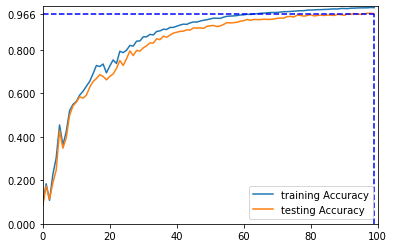

<Figure size 432x288 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(100)],train_acc,label='training Accuracy')
plt.plot([i for i in range(100)],test_acc,label='testing Accuracy')
plt.plot([99,99],[0,test_acc[-1]],'b--')
plt.plot([0,99],[test_acc[-1],test_acc[-1]],'b--')
plt.xlim(0,100)
plt.yticks([0,0.2,0.4,0.6,0.8,test_acc[-1],1.1])
plt.ylim(0,1)
plt.legend()
plt.show()
plt.savefig('MNIST_Epoch100.png')

In [70]:
files.download('MNIST_Epoch100.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>